In [29]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score

In [2]:
credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/creditcard_2023.csv')
credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
credit.set_index('id',inplace=True)

In [4]:
credit.shape

(568630, 30)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [6]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


In [7]:
credit.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We do not have any null value


In [8]:
credit['Amount'].describe().T

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

In [9]:
credit.duplicated().any()

True

We do not have any duplicated value


In [10]:
credit['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

We have balance dataset

In [11]:
credit.skew().sort_values()

V20       -1.556460
V2        -1.397952
V6        -0.201611
V21       -0.108983
V23       -0.099687
V1        -0.083417
V4        -0.044169
V11       -0.020891
V26       -0.018959
V19       -0.010171
Class      0.000000
Amount     0.001656
V15        0.011233
V3         0.014622
V13        0.014906
V25        0.023008
V24        0.066090
V12        0.066759
V18        0.129191
V9         0.171057
V14        0.207835
V16        0.266407
V8         0.299972
V22        0.318529
V17        0.373061
V10        0.740414
V5         1.506414
V28        1.724978
V27        2.755452
V7        19.026866
dtype: float64

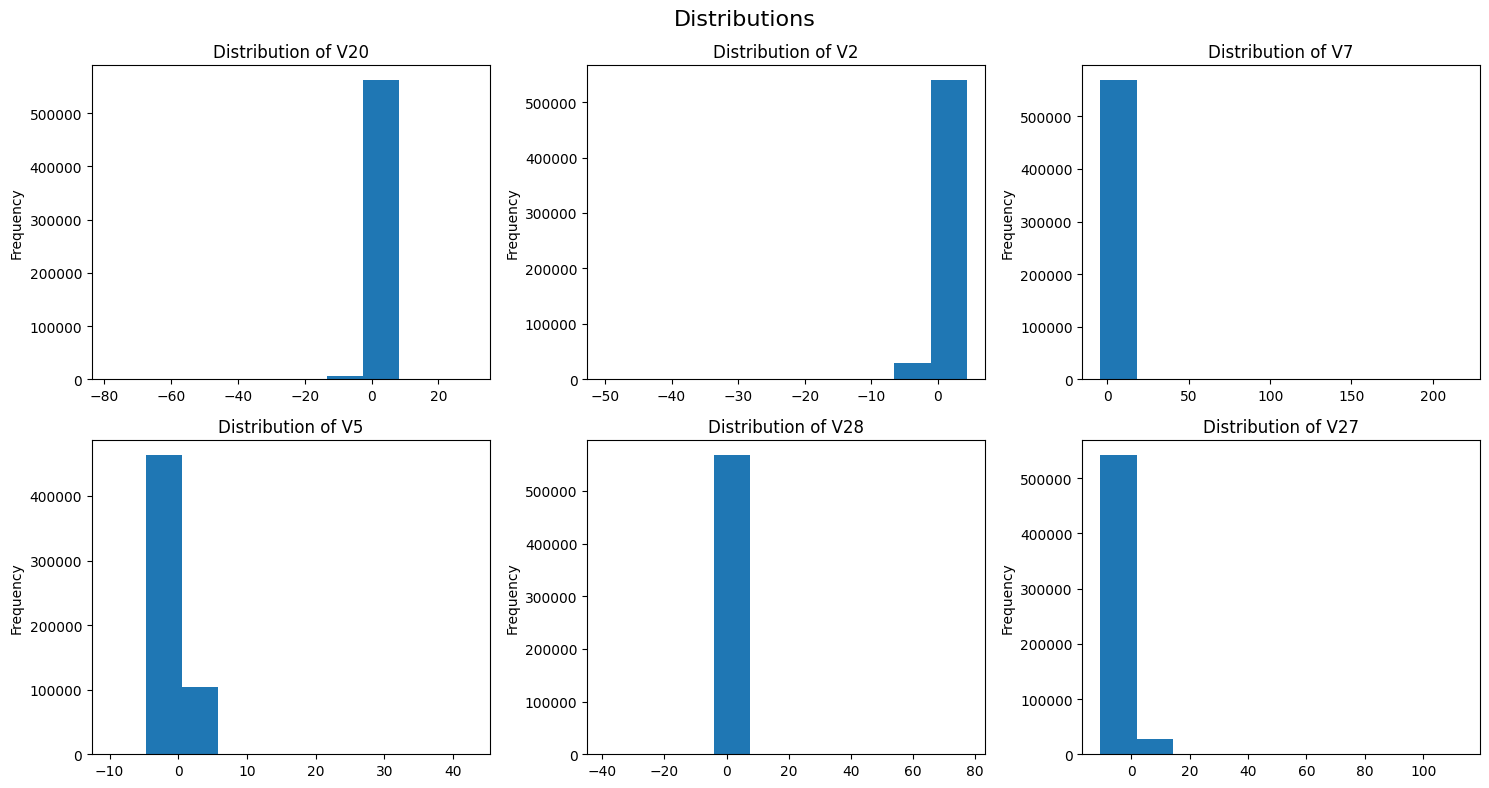

In [12]:
paper, axes = plt.subplots(2, 3, figsize=(15, 8))
credit['V20'].plot(kind='hist', ax=axes[0,0], title='Distribution of V20')
credit['V2'].plot(kind='hist', ax=axes[0,1], title='Distribution of V2')
credit['V7'].plot(kind='hist', ax=axes[0,2], title='Distribution of V7')
credit['V5'].plot(kind='hist', ax=axes[1,0], title='Distribution of V5')
credit['V28'].plot(kind='hist', ax=axes[1,1], title='Distribution of V28')
credit['V27'].plot(kind='hist', ax=axes[1,2], title='Distribution of V27')
plt.suptitle('Distributions',size=16)
plt.tight_layout()
plt.show()

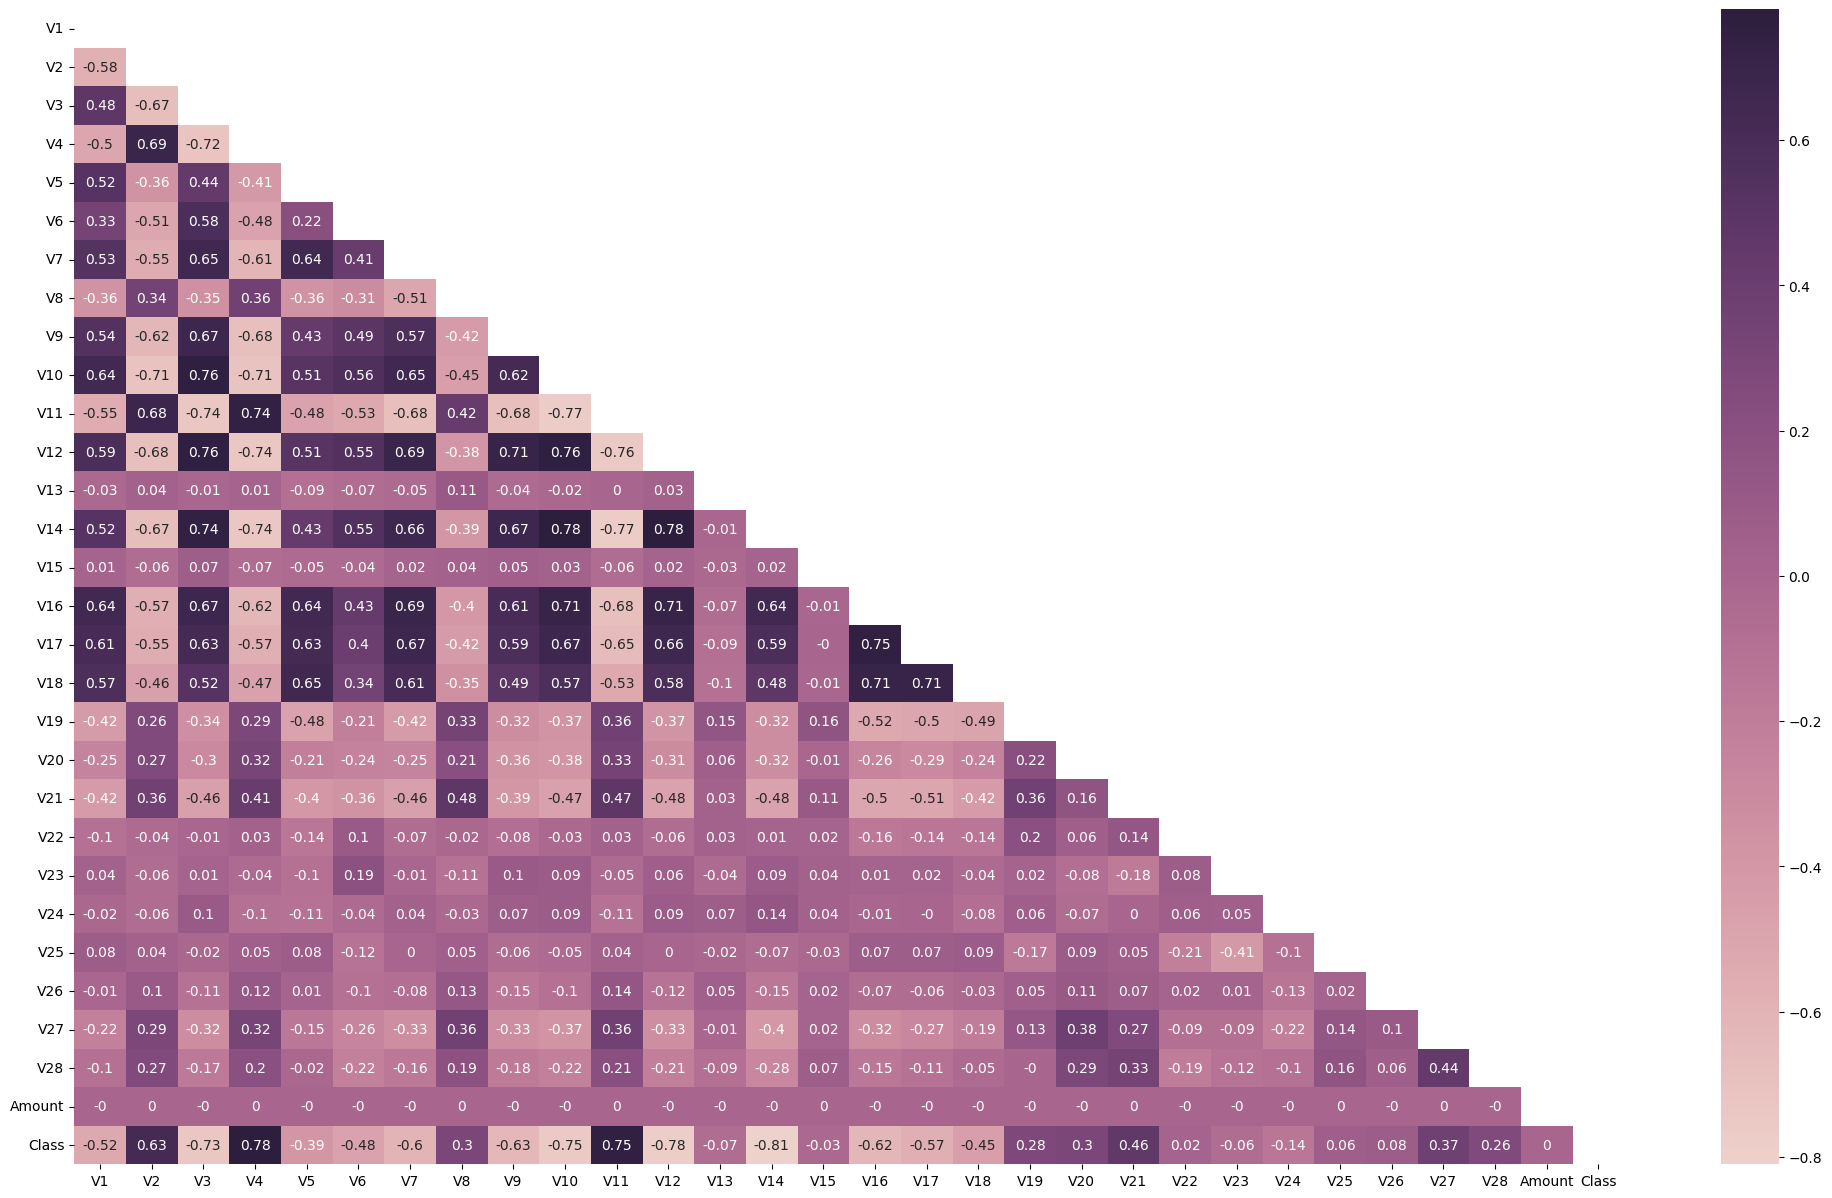

In [13]:
corr_df = credit.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=[25,15])
sns.heatmap(corr_df, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, mask = mask)
plt.show()

In [14]:
def generate_corr_mat(df, high=0.6, low=0.1):
    corr_mat = {'High_corr': {}, 'Low_corr': {}}
    df = df.abs()
    cols = df.columns.tolist()

    for i, val in df.iterrows():
        corr_mat['High_corr'][i] = [col for col in cols if val[col] > high and col != i]
        corr_mat['Low_corr'][i] = [col for col in cols if val[col] < low]

        print(f"Parameters having high co-relation with parameter \033[1m{i}\033[0m is/are: ", corr_mat['High_corr'][i])
        print(f"Parameters having apprx no co-relation with parameter \033[1m{i}\033[0m is/are: ", corr_mat['Low_corr'][i])
        print()

    return corr_mat

correlation_matrix = generate_corr_mat(corr_df)


Parameters having high co-relation with parameter V1 is/are:  ['V10', 'V16', 'V17']
Parameters having apprx no co-relation with parameter V1 is/are:  ['V13', 'V15', 'V23', 'V24', 'V25', 'V26', 'Amount']

Parameters having high co-relation with parameter V2 is/are:  ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'Class']
Parameters having apprx no co-relation with parameter V2 is/are:  ['V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'Amount']

Parameters having high co-relation with parameter V3 is/are:  ['V2', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']
Parameters having apprx no co-relation with parameter V3 is/are:  ['V13', 'V15', 'V22', 'V23', 'V25', 'Amount']

Parameters having high co-relation with parameter V4 is/are:  ['V2', 'V3', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'Class']
Parameters having apprx no co-relation with parameter V4 is/are:  ['V13', 'V15', 'V22', 'V23', 'V25', 'Amount']

Parameters having high co-relation with parameter V5 is/are:  [

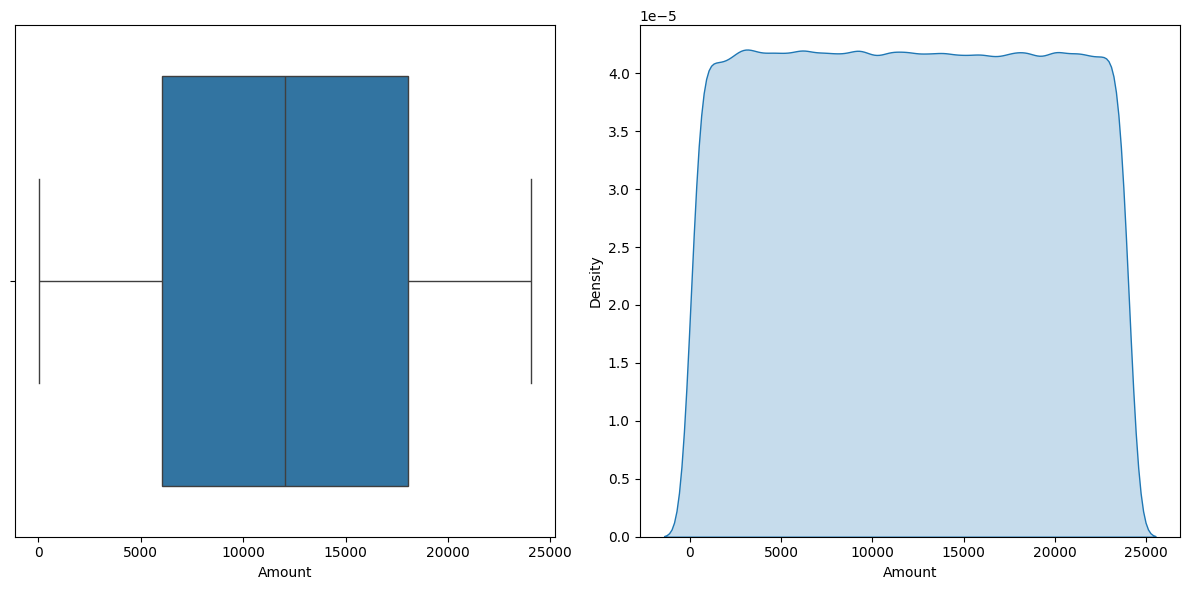

In [15]:
fig, axes = plt.subplots(1, 2, figsize = [12, 6])
sns.boxplot(data = credit, x = 'Amount', ax = axes[0])
sns.kdeplot(data = credit['Amount'], fill=True, ax = axes[1])
plt.tight_layout()
plt.show()

Amount is fairly Normally distributed.


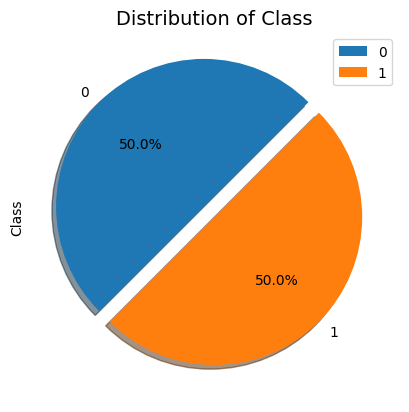

In [16]:
credit['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()



Our output feature is equally balanced.


**DATA Preparation**

In [17]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [18]:
x = credit.drop('Class',axis=1)
y = credit['Class']

In [19]:
print(x.shape)
print(y.shape)

(568630, 29)
(568630,)


**PCA**
To handle Multicollinearity

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
X_scaled = sc.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled,columns=x.columns)
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pc = pca.fit_transform(x)

x_New = pd.DataFrame(pc,columns = ['col_' + str(i) for i in range(12)])

x_New.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11
0,5940.142365,2.193067,-0.166059,0.265323,0.911906,0.480198,1.335198,-0.810905,-0.757509,-1.107031,0.234023,0.046038
1,-5510.587636,2.082929,0.356884,0.167334,0.019323,0.132030,-0.617572,-0.509375,-0.289077,-0.326988,-0.666863,-0.266453
2,-9528.417635,2.279193,-0.519102,-0.365144,0.380281,1.154322,0.171016,-1.218469,-1.537131,-1.232521,-1.807214,0.441801
3,-6657.517636,2.692145,0.109816,-0.258516,-1.141869,-0.679144,-1.146333,-0.321174,-1.467894,0.385348,0.002545,-0.581053
4,2237.012364,2.049822,-0.354971,0.937325,0.978921,0.593075,-0.906188,-1.251665,0.619645,0.614275,-0.317964,-0.277374


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x_New,y,test_size = 0.30,stratify=y)
cv = StratifiedKFold(n_splits = 8, shuffle = True)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398041, 12)
(170589, 12)
(398041,)
(170589,)


**Modeling**

In [35]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))

    ## ROC AUC
    prob = model.predict_proba(X_test)
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)


    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")

    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')

    plt.show()

    # Return evaluation metrics
    return model, accuracy, f1, roc_auc

Accuracy:  0.9533146920375875
F1 Score:  0.9532844480523179
AUC(ROC):  0.9533145428982001

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.98      0.93      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



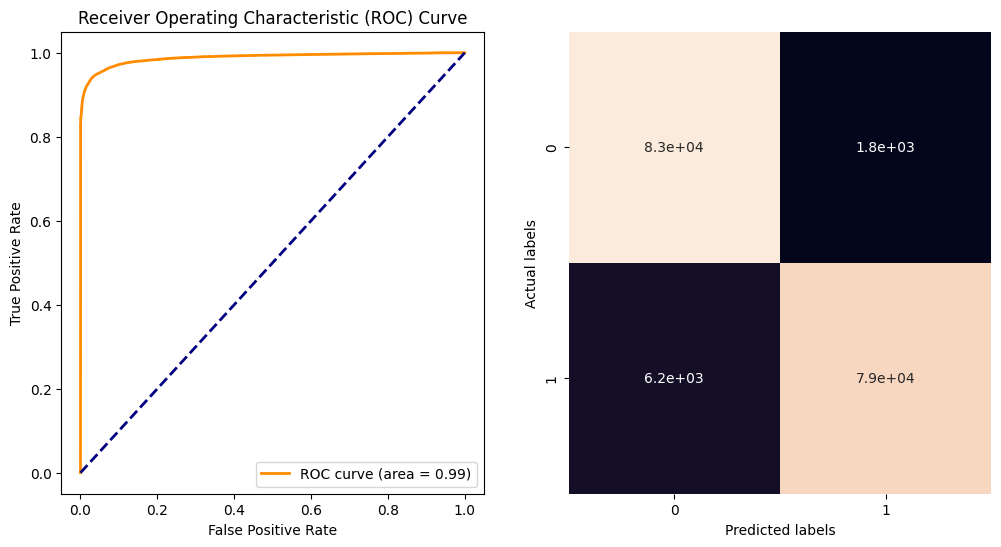

In [38]:
model_lr = LogisticRegression(max_iter=1000)
time_start = time.time()
model_lr, acc_lr, f1_lr, roc_auc_lr = train_model(model_lr, X_train, y_train, X_test, y_test)
time_taken_lr = time.time() - time_start

Accuracy:  0.9332489199186349
F1 Score:  0.9331328433261805
AUC(ROC):  0.9332486756946305

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     85295
           1       0.97      0.89      0.93     85294

    accuracy                           0.93    170589
   macro avg       0.94      0.93      0.93    170589
weighted avg       0.94      0.93      0.93    170589



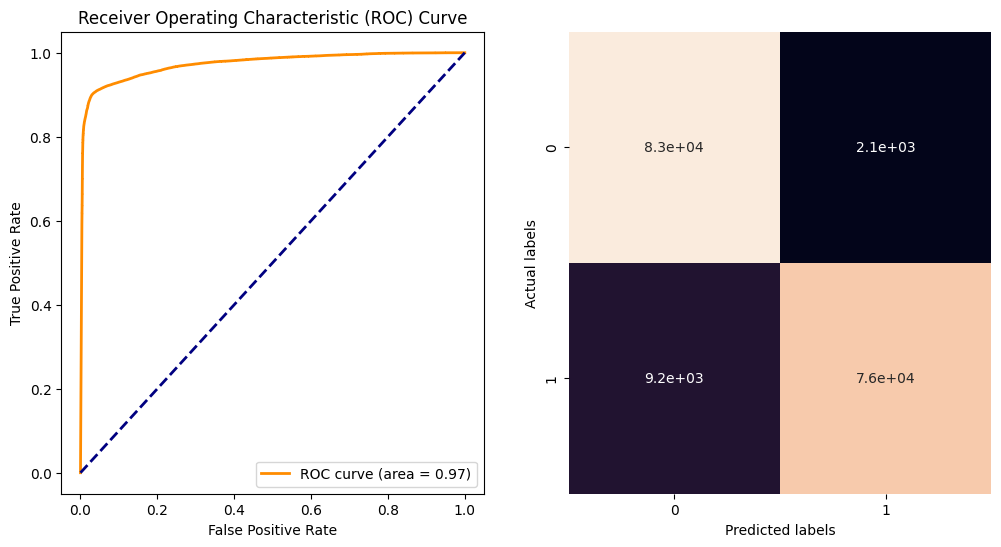

In [40]:
model_gnb = GaussianNB()
time_start = time.time()
model_gnb, acc_gnb, f1_gnb, roc_auc_gnb = train_model(model_gnb, X_train, y_train, X_test, y_test)
time_taken_gnb = time.time() - time_start

Accuracy:  0.9958496737773245
F1 Score:  0.9958496673976404
AUC(ROC):  0.9958496810622532

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.99      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



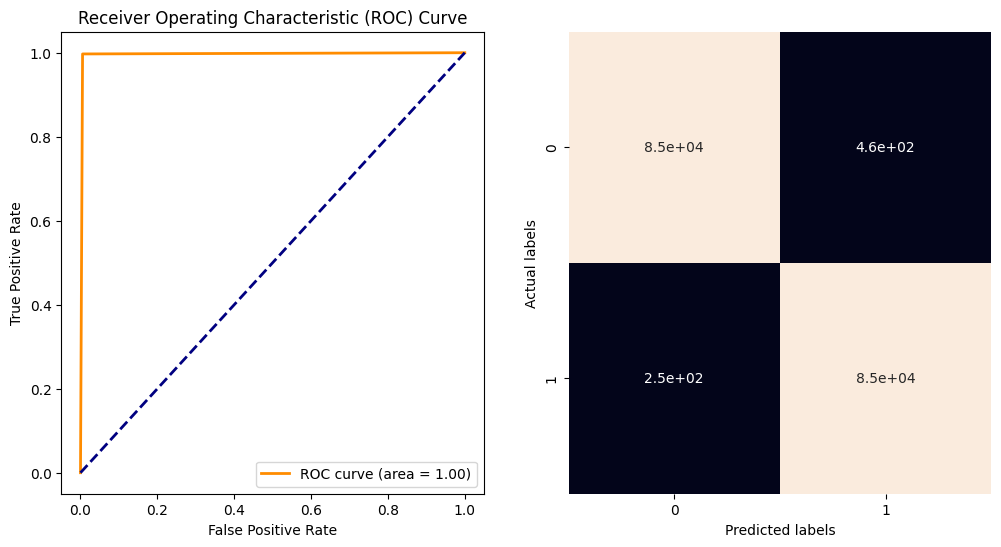

In [41]:
model_dt = DecisionTreeClassifier()
time_start = time.time()
model_dt, acc_dt, f1_dt, roc_auc_dt = train_model(model_dt, X_train, y_train, X_test, y_test)
time_taken_dt = time.time() - time_start

Accuracy:  0.9996013810972572
F1 Score:  0.9996013810758881
AUC(ROC):  0.9996013824717852

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



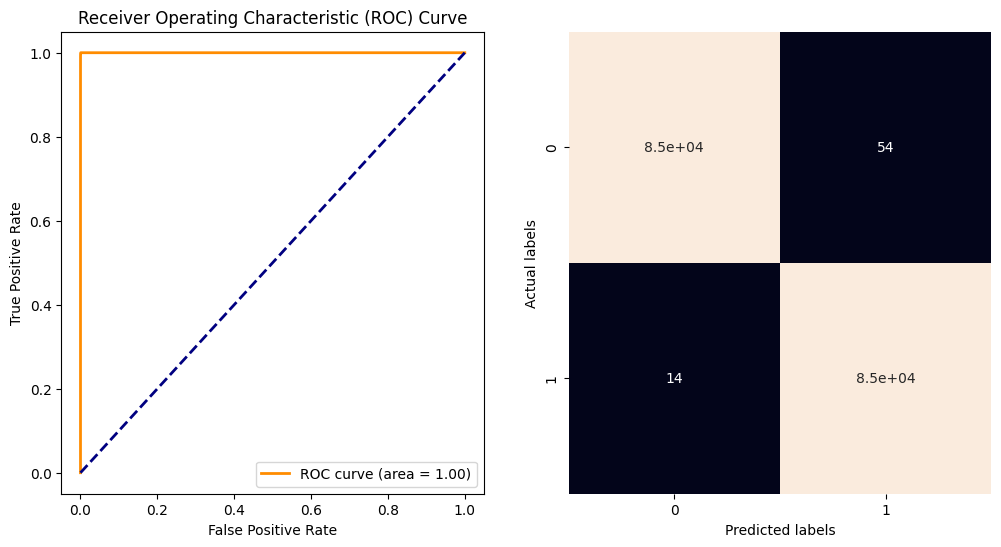

In [42]:
model_rf = RandomForestClassifier()
time_start = time.time()
model_rf, acc_rf, f1_rf, roc_auc_rf = train_model(model_rf, X_train, y_train, X_test, y_test)
time_taken_rf = time.time() - time_start

Accuracy:  0.9637960243626494
F1 Score:  0.9637710989590114
AUC(ROC):  0.9637958706189074

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     85295
           1       0.99      0.94      0.96     85294

    accuracy                           0.96    170589
   macro avg       0.97      0.96      0.96    170589
weighted avg       0.97      0.96      0.96    170589



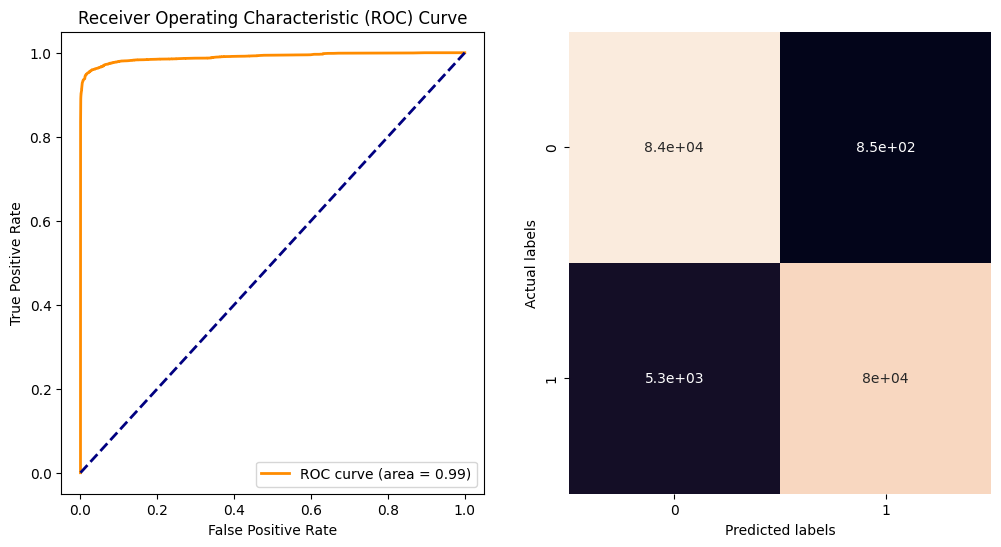

In [43]:
model_xgb = xgb.XGBRFClassifier()
time_start = time.time()
model_xgb, acc_xgb, f1_xgb, roc_auc_xgb = train_model(model_xgb, X_train, y_train, X_test, y_test)
time_taken_xgb = time.time() - time_start

In [44]:
accuracies = [acc_lr, acc_gnb, acc_dt, acc_rf, acc_xgb]
f_score = [f1_lr, f1_gnb, f1_dt, f1_rf, f1_xgb]
roc_auc = [roc_auc_lr, roc_auc_gnb, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
time = [time_taken_lr, time_taken_gnb, time_taken_dt, time_taken_rf, time_taken_xgb]

final_df = pd.DataFrame({"Accuracies": accuracies, "F1 Scores": f_score, "ROC AUC": roc_auc, "Time Taken": time},
                       index = ['LogisticReg', 'GaussianNB', 'DecisionTree', 'RandomForest', 'XGB'])
final_df = final_df.round(4)
final_df

,Accuracies,F1 Scores,ROC AUC,Time Taken
LogisticReg,0.9533,0.9533,0.9533,20.7915
GaussianNB,0.9332,0.9331,0.9332,1.6526
DecisionTree,0.9958,0.9958,0.9958,25.6527
RandomForest,0.9996,0.9996,0.9996,226.4470
XGB,0.9638,0.9638,0.9638,13.1305



Consclusion

We have done Exploratory Data analysis for different features.

  We prepared our Data and build different ML Models.
  We have seen how different models are performing w.r.t Accuracy, Precision, Recall, F1 Scores and AUC ROC.
  Decision Tree with default parameters is giving 99.56% accuracy on test dataset [computational inexpensive].
  Random Forest with default parameters is giving 99.94% accuracy on test dataset [computational expensive].

